In [57]:
from pathlib import Path
import pandas as pd

In [2]:
from ethicml.algorithms.inprocess import GPyT, GPyTDemPar, GPyTEqOdds, LR, SVM, Agarwal, Kamiran, Kamishima, LRCV, ZafarEqOpp
from ethicml.evaluators import evaluate_models, CrossValidator, run_metrics
from ethicml.data import Compas, Adult, load_data
from ethicml.metrics import Accuracy, ProbPos, TPR, TNR, AbsCV
from ethicml.preprocessing import train_test_split
from ethicml.visualisation.plot import plot_mean_std_box, single_plot_mean_std_box

In [3]:
# YOU DON'T HAVE TO UNDERSTAND THE CODE IN THIS CELL
# we only tell the model where the "run.py" is and where the python executable is
code_dir = Path('..')
def gp(**kwargs):
    return GPyT(code_dir=code_dir, **kwargs)
def gp_dp(**kwargs):
    return GPyTDemPar(code_dir=code_dir, **kwargs)
def gp_eo(**kwargs):
    return GPyTEqOdds(code_dir=code_dir, **kwargs)

In [4]:
# tnr_race_False = 0.724
# tnr_race_True = 0.702
# tnr_sex_True = 0.724
# tnr_sex_False = 0.744
tnr_in_true_race = 0.71
tnr_in_false_race = 0.74
tnr_in_true_sex = 0.72
tnr_in_false_sex = 0.77

In [5]:
# specify flags for GP
gp_flags = dict(epochs=70, length_scale=1.2, use_loo=False, iso=False)

In [6]:
algos = []

algos += [gp(s_as_input=True, flags=gp_flags)]
algos += [gp(s_as_input=False, flags=gp_flags)]
# algos += [gp_dp(epochs=70, s_as_input=True)]

for tpr in [0.6,0.7,0.8,0.9]:
    algos += [gp_eo(s_as_input=True, tnr1=tnr_in_true_race, tnr0=tnr_in_true_race, tpr0=tpr, tpr1=tpr, flags=gp_flags)]
    algos += [gp_eo(s_as_input=False, tnr1=tnr_in_false_race, tnr0=tnr_in_false_race, tpr0=tpr, tpr1=tpr, flags=gp_flags)]

baselines = [
     LR(),
     SVM(),
#     Agarwal(fairness="EqOd"),
#     Kamiran(),
#     Kamishima(),
    ZafarEqOpp(),
]
algos += baselines

In [7]:
data = [
    Compas("Race"),
    Compas("Sex"),
#     Adult("Race"),
#     Adult("Sex"),
]

In [ ]:
results = evaluate_models(
    datasets=data,
    inprocess_models=algos,
    metrics=[Accuracy(), TPR(), TNR()],
    per_sens_metrics=[TPR(), TNR()], 
    repeats=5,
    proportional_splits=True,
    delete_prev=True,  # delete previous results
)
results

In [9]:
results

Accuracy  \
dataset     transform    model                                              repeat              
Compas Sex  no_transform GPyT_in_True                                       0-14460  0.678282   
                         GPyT_in_False                                      0-14460  0.675041   
                         GPyT_eq_odds_in_True_0tnr_0.71_1tnr_0.71_0tpr_0... 0-14460  0.657212   
                         GPyT_eq_odds_in_False_0tnr_0.74_1tnr_0.74_0tpr_... 0-14460  0.660454   
                         GPyT_eq_odds_in_True_0tnr_0.71_1tnr_0.71_0tpr_0... 0-14460  0.662075   
...                                                                                       ...   
Compas Race no_transform GPyT_eq_odds_in_True_0tnr_0.71_1tnr_0.71_0tpr_0... 4-12050  0.664234   
                         GPyT_eq_odds_in_False_0tnr_0.74_1tnr_0.74_0tpr_... 4-12050  0.652879   
                         Logistic Regression, C=1.0                         4-12050  0.665045   
                         SVM                                                4-12050  0.682076   
                         ZafarEqOpp, τ=5.0, μ=1.2                           4-12050  0.633414   

                                                                                          TNR  \
dataset     transform    model                                              repeat              
Compas Sex  no_transform GPyT_in_True                                       0-14460  0.702381   
                         GPyT_in_False                                      0-14460  0.724702   
                         GPyT_eq_odds_in_True_0tnr_0.71_1tnr_0.71_0tpr_0... 0-14460  0.687500   
                         GPyT_eq_odds_in_False_0tnr_0.74_1tnr_0.74_0tpr_... 0-14460  0.705357   
                         GPyT_eq_odds_in_True_0tnr_0.71_1tnr_0.71_0tpr_0... 0-14460  0.694940   
...                                                                                       ...   
Compas Race no_transform GPyT_eq_odds_in_True_0tnr_0.71_1tnr_0.71_0tpr_0... 4-12050  0.619048   
                         GPyT_eq_odds_in_False_0tnr_0.74_1tnr_0.74_0tpr_... 4-12050  0.614583   
                         Logistic Regression, C=1.0                         4-12050  0.760417   
                         SVM                                                4-12050  0.802083   
                         ZafarEqOpp, τ=5.0, μ=1.2                           4-12050  0.697917   

                                                                                     TNR_race_0  \
dataset     transform    model                                              repeat                
Compas Sex  no_transform GPyT_in_True                                       0-14460         NaN   
                         GPyT_in_False                                      0-14460         NaN   
                         GPyT_eq_odds_in_True_0tnr_0.71_1tnr_0.71_0tpr_0... 0-14460         NaN   
                         GPyT_eq_odds_in_False_0tnr_0.74_1tnr_0.74_0tpr_... 0-14460         NaN   
                         GPyT_eq_odds_in_True_0tnr_0.71_1tnr_0.71_0tpr_0... 0-14460         NaN   
...                                                                                         ...   
Compas Race no_transform GPyT_eq_odds_in_True_0tnr_0.71_1tnr_0.71_0tpr_0... 4-12050    0.600962   
                         GPyT_eq_odds_in_False_0tnr_0.74_1tnr_0.74_0tpr_... 4-12050    0.572115   
                         Logistic Regression, C=1.0                         4-12050    0.735577   
                         SVM                                                4-12050    0.776442   
                         ZafarEqOpp, τ=5.0, μ=1.2                           4-12050    0.670673   

                                                                                     TNR_race_0-race_1  \
dataset     transform    model                                              repeat                       
Compas Sex  no_transform GPyT_in_True                        

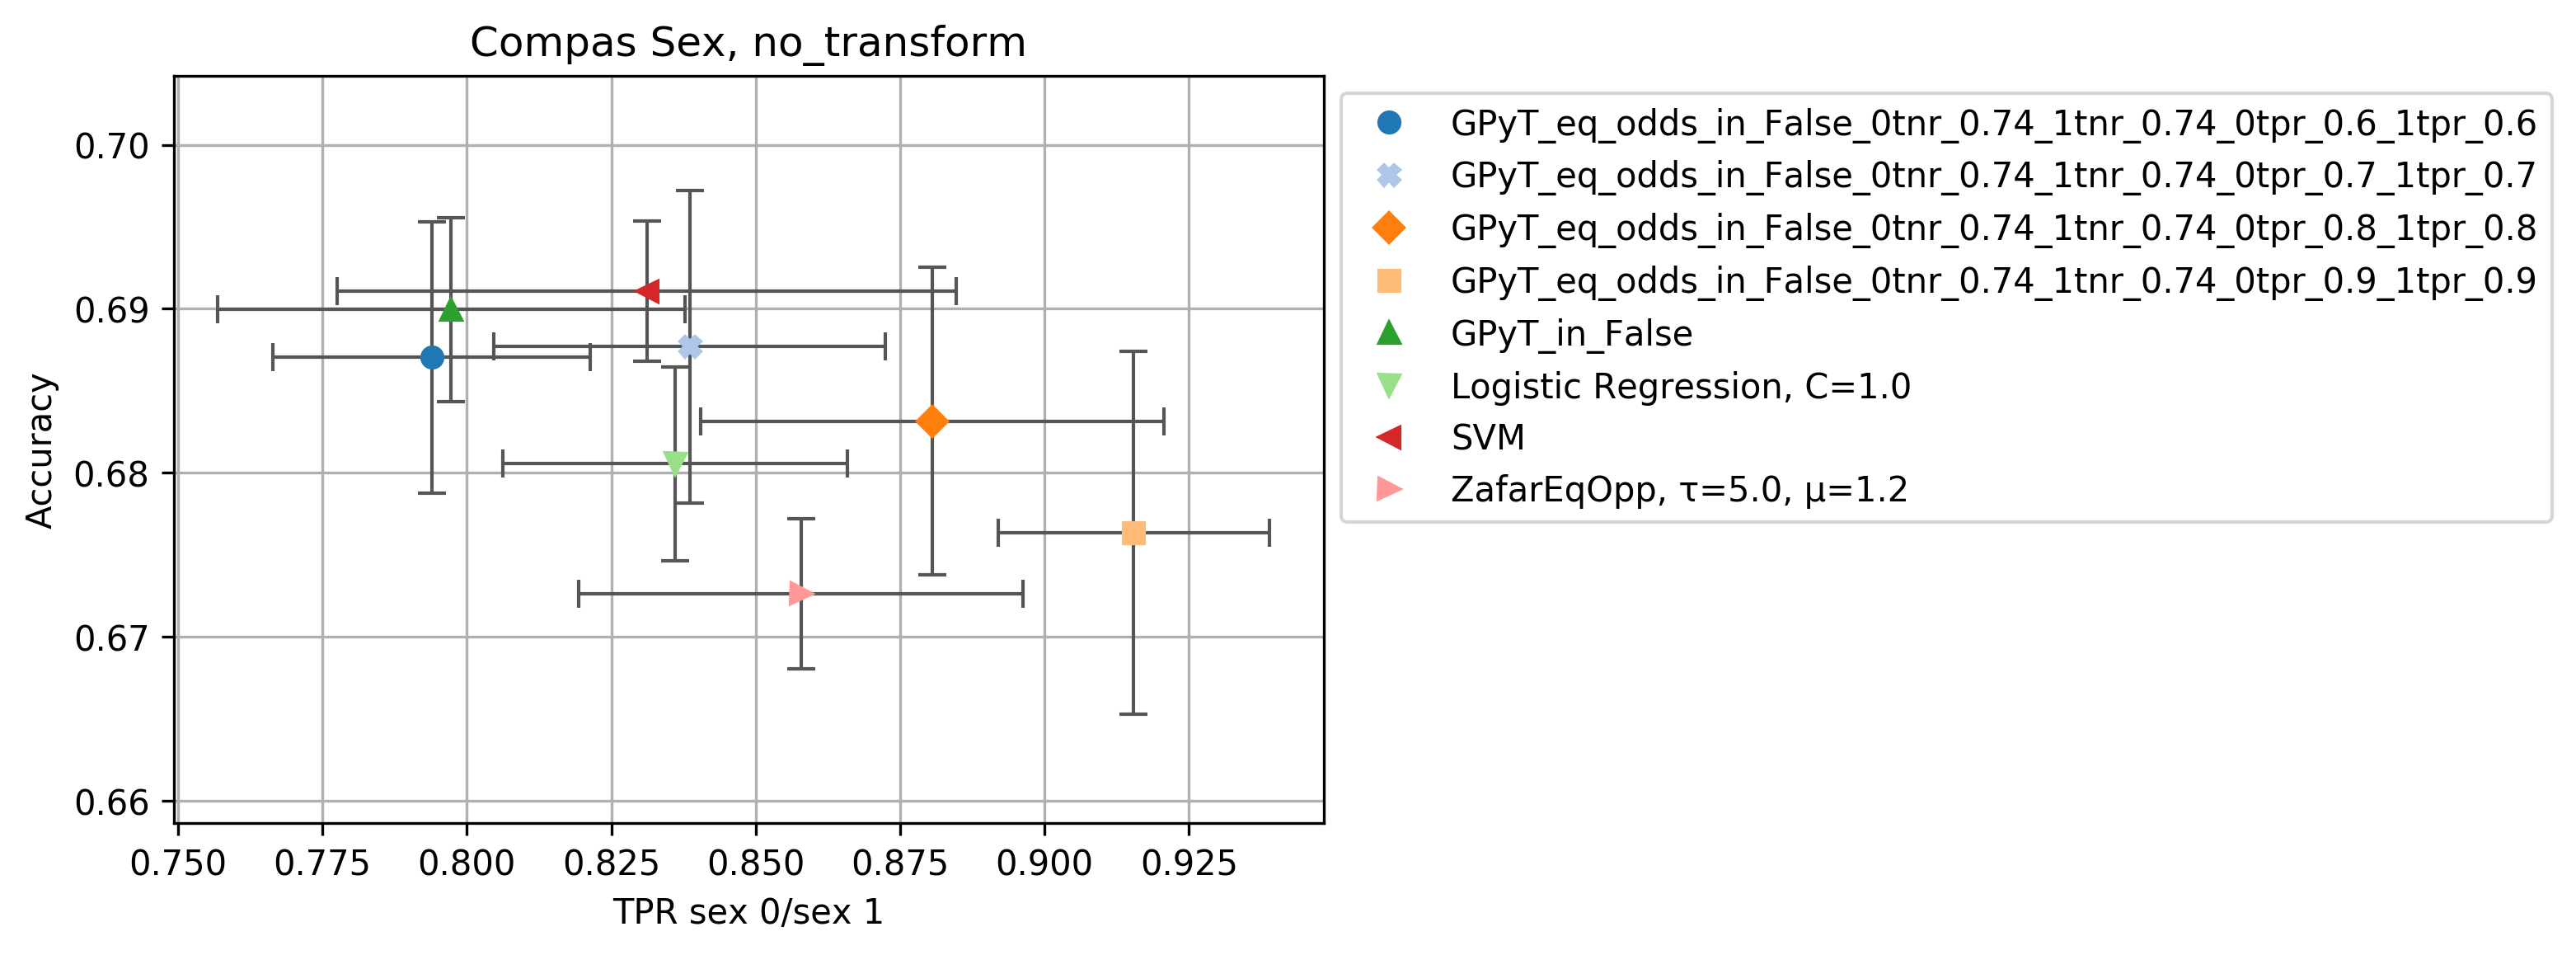

In [55]:
# results = pd.read_csv("results/Compas Race_no_transform.csv").set_index(["dataset", "transform", "model", "repeat"])

plot_mean_std_box(results.query('~model.str.contains("True")'), "Accuracy", "TPR_race_0/race_1", save=False, use_cross=True)[0][0]

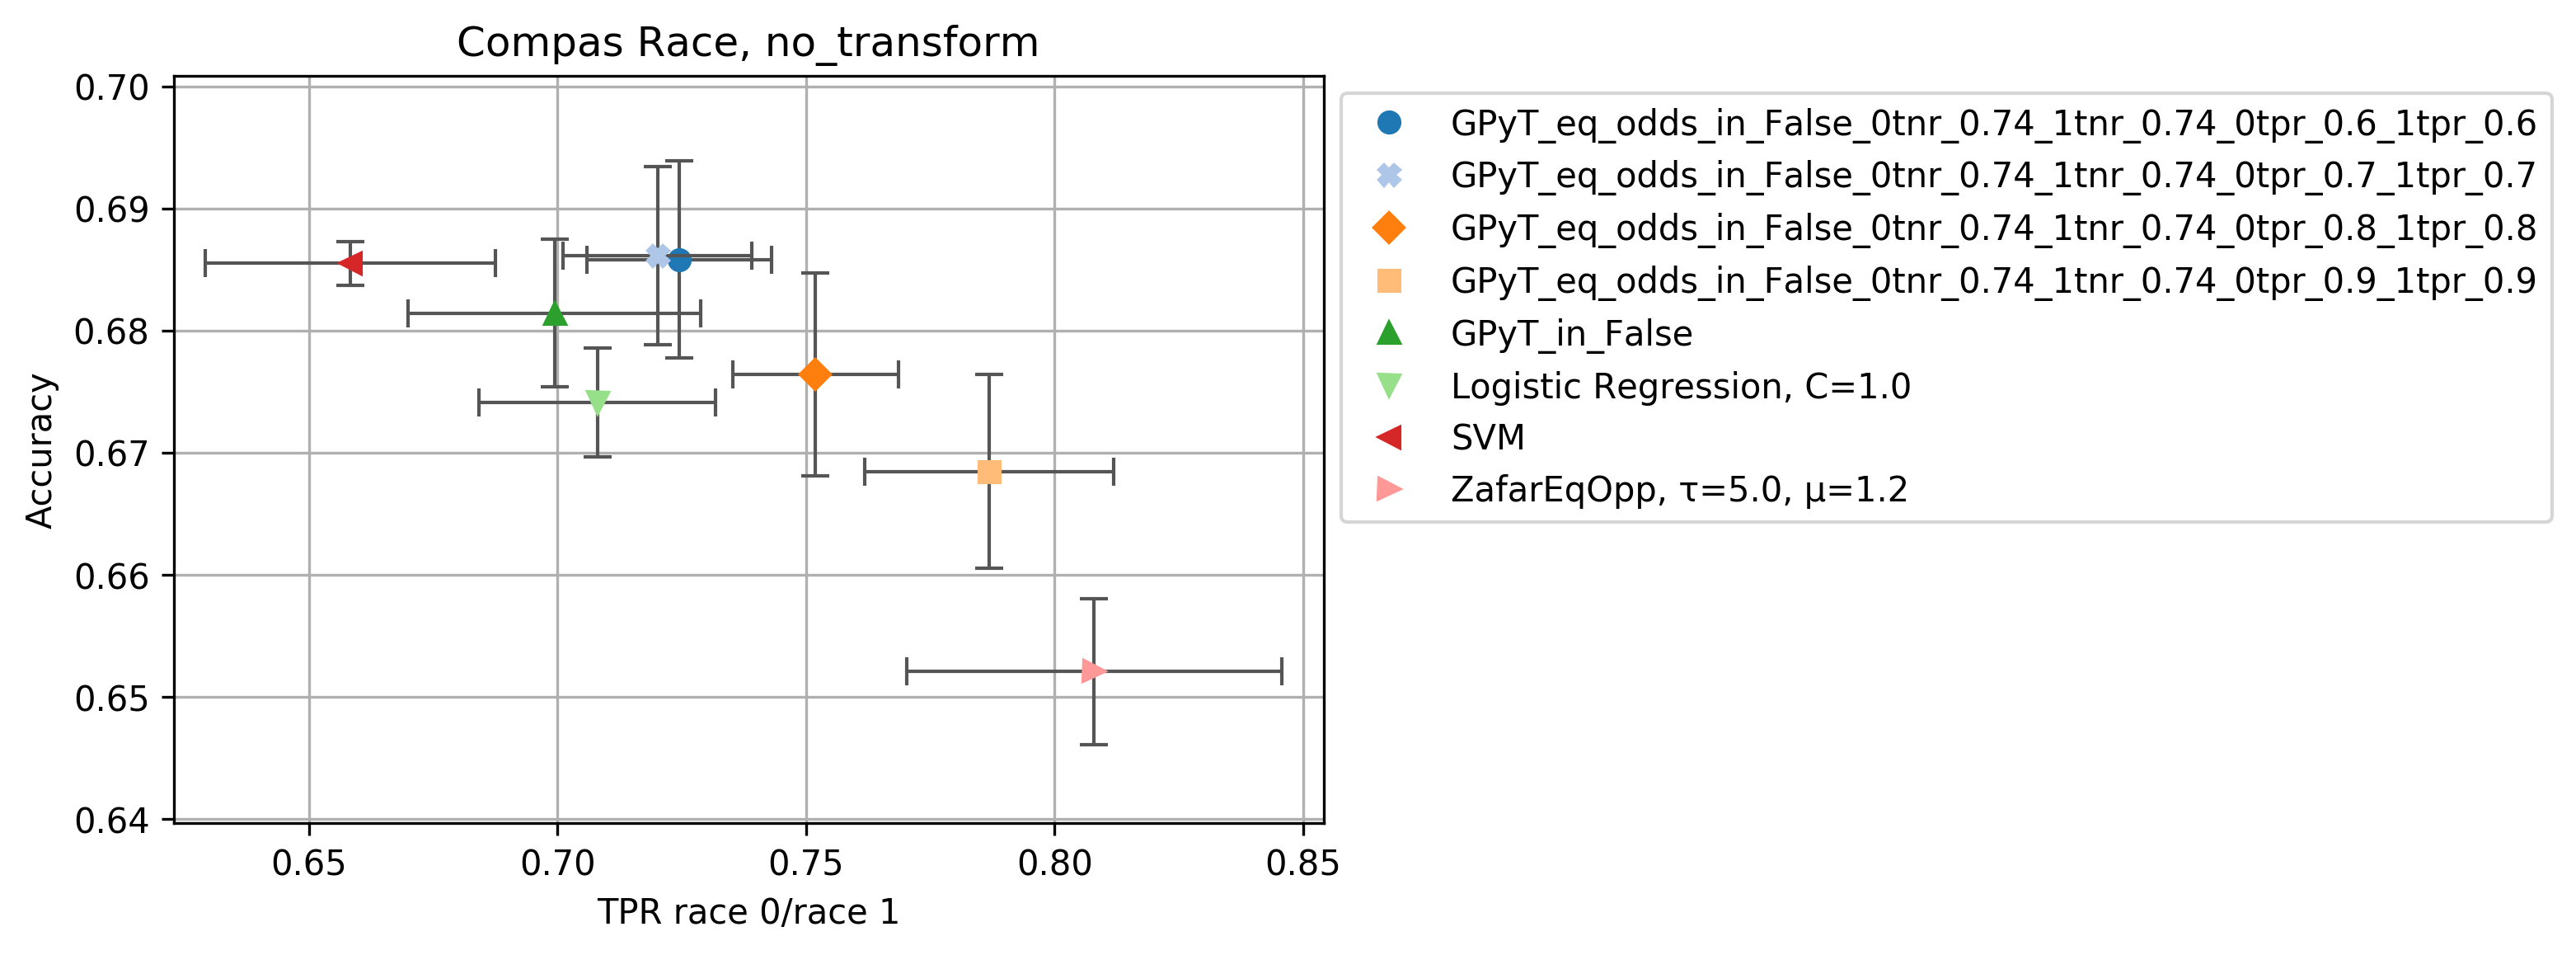

In [56]:
plot_mean_std_box(results.query('~model.str.contains("True")'), "Accuracy", "TPR_sex_0/sex_1", save=False, use_cross=True)[0][0]